<a href="https://colab.research.google.com/github/Sir-Ripley/QuantumAffinityGravity/blob/main/BugasphereQAG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Initiating QAG Resonance Protocol... (Base-12 Topology)
Simulation Complete. Rendering Resonance Map...


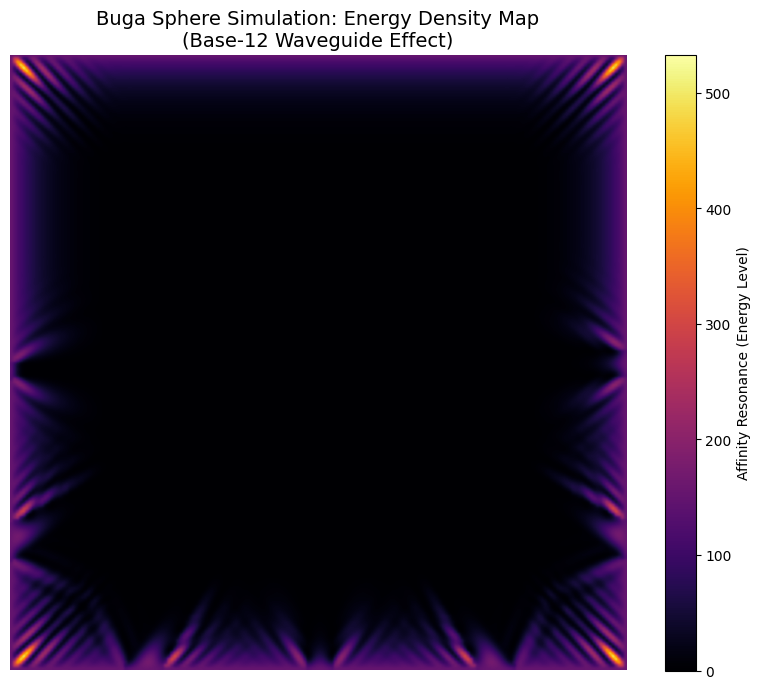

In [ ]:

import numpy as np
import matplotlib.pyplot as plt

def generate_buga_simulation():
    # --- 1. System Parameters (The Physics of Affinity) ---
    N = 200             # Grid size (Spatial resolution of the sphere surface)
    T = 300             # Time steps (Duration of the "chant" or frequency input)
    c = 0.5             # Wave speed (representing the material's 'Affinity' tension)
    damping = 0.99      # Natural energy loss in the material

    # Initialize Wave Fields (u = current, u_prev = previous time step)
    u = np.zeros((N, N))
    u_prev = np.zeros((N, N))
    u_next = np.zeros((N, N))

    # --- 2. The "Base-12" Etching Mask ---
    # We create a 'conductivity' map. The wave travels best where the etchings are.
    # We use a radial Base-12 pattern (12 "spokes" or channels).
    conductivity = np.ones((N, N)) * 0.1 # Low conductivity background (the smooth metal)

    center_x, center_y = N // 2, N // 2
    y, x = np.ogrid[:N, :N]

    # Calculate angles for the base-12 geometry
    angle = np.arctan2(y - center_y, x - center_x)
    radius = np.sqrt((x - center_x)**2 + (y - center_y)**2)

    # Create 12 distinct channels (The "Glyphs")
    # Using modulo math to create 12 symmetric pathways
    # We allow waves to propagate freely (val = 1.0) along these 12 angles
    for k in range(12):
        target_angle = (2 * np.pi * k) / 12
        # Create a narrow channel for each spoke
        mask_channel = np.abs(angle - target_angle) < 0.05
        conductivity[mask_channel] = 1.0

    # Also high conductivity at the Core (The "Chip")
    conductivity[radius < 5] = 1.0

    # --- 3. The Simulation Loop (Running the Experiment) ---
    # We inject 'sound' from the outer edge, mimicking an external chant or vibration
    print(f"Initiating QAG Resonance Protocol... (Base-12 Topology)")

    energy_accumulation = np.zeros((N, N))

    for t in range(T):
        # Inject Signal at the borders (The "Input")
        frequency = 0.2
        input_signal = np.sin(frequency * t)
        u[0, :] = input_signal
        u[-1, :] = input_signal
        u[:, 0] = input_signal
        u[:, -1] = input_signal

        # The Discrete Wave Equation (Finite Difference Method)
        # Laplacian calculation
        laplacian = (
            np.roll(u, 1, axis=0) + np.roll(u, -1, axis=0) +
            np.roll(u, 1, axis=1) + np.roll(u, -1, axis=1) - 4*u
        )

        # Apply the 'Conductivity' (The Etchings guiding the wave)
        # The wave propagates faster/stronger along the Base-12 paths
        u_next = 2*u - u_prev + (c**2 * conductivity * laplacian)
        u_next *= damping # Apply entropy

        # Update state
        u_prev = u.copy()
        u = u_next.copy()

        # Track Energy (Kinetic + Potential)
        energy_accumulation += u**2

    # --- 4. Visualization ---
    plt.figure(figsize=(10, 8))
    plt.title(f"Buga Sphere Simulation: Energy Density Map\n(Base-12 Waveguide Effect)", fontsize=14)

    # Plotting the accumulated energy to see where it focused
    im = plt.imshow(energy_accumulation, cmap='inferno', interpolation='gaussian')
    plt.colorbar(im, label="Affinity Resonance (Energy Level)")
    plt.axis('off')

    print("Simulation Complete. Rendering Resonance Map...")
    plt.show()

# Run the lab simulation
generate_buga_simulation()